## Упражнения по библиотеке Numpy

In [1]:
from collections import Counter
import numpy as np
from TASKS.utils.design import *
from TASKS.consts import NUMPY_CSV_PATH
from scipy.spatial.distance import cdist
import time
import pandas as pd
from TASKS.utils.graphic.builder import Builder

**1.** Дан случайный массив, поменять знак у элементов, значения которых между 3 и 8

In [42]:
arr = np.random.randint(0, 10, size=20)

Message.print_message(f'Сформированный массив: {arr}', Color.BLUE, Color.LIGHT_WHITE)

matching_mask = (arr > 3) & (arr < 8)

arr[matching_mask] *= - 1

Message.print_message(f'Итоговый массив NumPy имеет вид: {arr}', Color.GREEN, Color.LIGHT_WHITE)



+------------------------------------------------------------------+
| Сформированный массив: [8 2 1 9 3 9 2 0 5 4 3 5 3 6 0 1 6 0 4 9] |
+------------------------------------------------------------------+

+------------------------------------------------------------------------------------------------+
| Итоговый массив NumPy имеет вид: [ 8  2  1  9  3  9  2  0 -5 -4  3 -5  3 -6  0  1 -6  0 -4  9] |
+------------------------------------------------------------------------------------------------+


**2.** Заменить максимальный элемент случайного массива на 0

In [43]:
arr = np.random.randint(1, 10, size=20)

Message.print_message(f'Сформированный массив: {arr}',
                      Color.BLUE,
                      Color.LIGHT_WHITE)

matching_mask = arr == arr.max()

arr[matching_mask] = 0

Message.print_message(f'Итоговый массив NumPy имеет вид: {arr}',
                      Color.GREEN,
                      Color.LIGHT_WHITE)



+------------------------------------------------------------------+
| Сформированный массив: [3 4 2 5 6 5 5 3 7 9 3 1 8 1 2 9 6 9 9 9] |
+------------------------------------------------------------------+

+----------------------------------------------------------------------------+
| Итоговый массив NumPy имеет вид: [3 4 2 5 6 5 5 3 7 0 3 1 8 1 2 0 6 0 0 0] |
+----------------------------------------------------------------------------+


**3.** Построить прямое произведение массивов (все комбинации с каждым элементом). На вход подается двумерный массив

In [3]:
arr = np.random.randint(1, 10, size= (2, 3))

Message.print_matrix(arr, 'Сформированный массив NumPy имеет вид:')

grids = np.meshgrid(*arr, indexing='ij')
combinations = np.stack(grids, axis=-1).reshape(-1, arr.shape[0])

Message.print_matrix(combinations, 'Все комбинации (прямое произведение):')



+----------------------------------+
| Исходный массив NumPy имеет вид: |
+----------------------------------+
(  8  3  5  )
(  6  4  7  )

+---------------------------------------+
| Все комбинации (прямое произведение): |
+---------------------------------------+
(  8  6  )
(  8  4  )
(  8  7  )
(  3  6  )
(  3  4  )
(  3  7  )
(  5  6  )
(  5  4  )
(  5  7  )


**4.** Даны 2 массива A (8x3) и B (2x2). Найти строки в A, которые содержат элементы из каждой строки в B, независимо от порядка элементов в B

In [34]:
arr_1 = np.random.randint(1, 7, size= (8, 3))
arr_2 = np.random.randint(1, 3, size= (2, 2))

Message.print_matrix(arr_1, 'Сформированный первый массив NumPy имеет вид:')

Message.print_matrix(arr_2, 'Сформированный второй массив NumPy имеет вид:')

matching_mask = np.ones(arr_1.shape[0], dtype=bool)

for b_row in arr_2:
    contains_all = np.all([
        np.any(arr_1 == element, axis=1) for element in b_row
    ], axis=0)
    matching_mask &= contains_all

result = arr_1[matching_mask]

Message.print_matrix(result, 'строки в A, которые содержат элементы из каждой строки в B, независимо от порядка элементов в B:')



+-----------------------------------------------+
| Сформированный первый массив NumPy имеет вид: |
+-----------------------------------------------+
(  1  1  2  )
(  3  5  3  )
(  4  2  4  )
(  3  3  6  )
(  2  6  4  )
(  4  4  3  )
(  4  4  2  )
(  5  2  1  )

+-----------------------------------------------+
| Сформированный второй массив NumPy имеет вид: |
+-----------------------------------------------+
(  2  1  )
(  1  1  )

+---------------------------------------------------------------------------------------------------+
| строки в A, которые содержат элементы из каждой строки в B, независимо от порядка элементов в B : |
+---------------------------------------------------------------------------------------------------+
(  1  1  2  )
(  5  2  1  )


**5.** Дана 10x3 матрица, найти строки из неравных значений (например строка [2,2,3] остается, строка [3,3,3] удаляется)

In [41]:
arr = np.random.randint(1, 3, size= (10, 3))

Message.print_matrix(arr, 'Сформированный массив NumPy имеет вид:')

matching_mask = ~(np.all(arr == arr[:, [0]], axis=1))

result = arr[matching_mask]

Message.print_matrix(result, 'Cтроки из неравных значений в матрице:')



+----------------------------------------+
| Сформированный массив NumPy имеет вид: |
+----------------------------------------+
(  2  2  1  )
(  1  2  1  )
(  1  1  1  )
(  1  2  1  )
(  1  1  1  )
(  1  2  2  )
(  1  1  1  )
(  2  2  1  )
(  1  1  1  )
(  2  2  2  )

+----------------------------------------+
| Cтроки из неравных значений в матрице: |
+----------------------------------------+
(  2  2  1  )
(  1  2  1  )
(  1  2  1  )
(  1  2  2  )
(  2  2  1  )


**6.** Дан двумерный массив. Удалить те строки, которые повторяются

In [44]:
arr = np.random.randint(1, 4, size= (10, 2))

Message.print_matrix(arr, 'Сформированный массив NumPy имеет вид:')

result_arr = np.unique(arr, axis=0)

Message.print_matrix(result_arr, 'Массив после удаления дубликатов имеет вид:')



+----------------------------------------+
| Сформированный массив NumPy имеет вид: |
+----------------------------------------+
(  1  1  )
(  3  2  )
(  1  3  )
(  2  3  )
(  3  3  )
(  1  1  )
(  2  1  )
(  1  3  )
(  2  3  )
(  1  2  )

+---------------------------------------------+
| Массив после удаления дубликатов имеет вид: |
+---------------------------------------------+
(  1  1  )
(  1  2  )
(  1  3  )
(  2  1  )
(  2  3  )
(  3  2  )
(  3  3  )


Для каждой из следующих задач (1-5) нужно привести 2 реализации – одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная с использованием numpy (без использования питоновских циклов/map/list comprehension).


__Замечание 1.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы).

__Замечание 2.__ Для большинства задач решение занимает не больше 1-2 строк.

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [5]:
def diagonal_product(matrix: list[list[int]]) -> int:
    product = 1
    for k in range(min(len(matrix), len(matrix[0]))):
        if matrix[k][k] != 0:
            product *= matrix[k][k]
    return product

def diagonal_product_np(array: np.ndarray) -> int:
    diagonal = np.diag(array)
    non_zero = diagonal[diagonal != 0]
    if len(non_zero) == 0:
        return 0
    return np.prod(non_zero)


np_lst = np.random.randint(1, 10, size=(3, 5))
lst = np_lst.tolist()

Message.print_matrix(np_lst, 'Сформированный массив NumPy имеет вид:')

Message.print_message(f'Решение с помощью NumPy, ответ: {diagonal_product_np(np_lst)}',
                      Color.GREEN,
                      Color.LIGHT_WHITE)


Message.print_message(f'Решение без использования NumPy, ответ: {diagonal_product(lst)}',
                      Color.RED,
                      Color.LIGHT_WHITE)



+----------------------------------------+
| Сформированный массив NumPy имеет вид: |
+----------------------------------------+
(  6  2  4  2  4  )
(  5  5  7  7  7  )
(  8  7  8  5  6  )

+-------------------------------------+
| Решение с помощью NumPy, ответ: 240 |
+-------------------------------------+

+---------------------------------------------+
| Решение без использования NumPy, ответ: 240 |
+---------------------------------------------+


* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [17]:
def is_multiset(array1: list[int], array2: list[int]) -> bool:
    return Counter(array1) == Counter(array2)

def is_multiset_np(array1: np.ndarray, array2: np.ndarray ) -> bool:
    
    return np.array_equal(np.sort(array1), np.sort(array2))


np_lst_1 = np.random.randint(1, 3, size=5)
np_lst_2 = np.random.randint(1, 3, size=5)

lst_1 = np_lst_1.tolist()
lst_2 = np_lst_2.tolist()

Message.print_message(f'Сформированный ПЕРВЫЙ массив NumPy имеет вид: {np_lst_1}',
                      Color.PURPLE,
                      Color.LIGHT_WHITE)

Message.print_message(f'Сформированный ВТОРОЙ массив NumPy имеет вид: {np_lst_2}',
                      Color.PURPLE,
                      Color.LIGHT_WHITE)

Message.print_message(f'Решение с помощью NumPy, ответ: {is_multiset_np(np_lst_1, np_lst_2)}',
                      Color.GREEN,
                      Color.LIGHT_WHITE)

Message.print_message(f'Решение без использования NumPy, ответ: {is_multiset(lst_1, lst_2)}',
                      Color.RED,
                      Color.LIGHT_WHITE)



+-----------------------------------------------------------+
| Сформированный ПЕРВЫЙ массив NumPy имеет вид: [1 2 1 1 2] |
+-----------------------------------------------------------+

+-----------------------------------------------------------+
| Сформированный ВТОРОЙ массив NumPy имеет вид: [1 1 1 2 2] |
+-----------------------------------------------------------+

+--------------------------------------+
| Решение с помощью NumPy, ответ: True |
+--------------------------------------+

+----------------------------------------------+
| Решение без использования NumPy, ответ: True |
+----------------------------------------------+


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит ноль. 
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [21]:
def max_after_zero(array: list[int]) -> int:
    answer = float('-inf')
    for k in range(1, len(array)):
        if array[k - 1] == 0:
            answer = max(answer, array[k])
    return answer

def max_after_zero_np(array: np.ndarray) -> int:
    return np.max(array[1:][array[:-1] == 0])


np_lst_1 = np.random.randint(0, 10, size=20)

lst_1 = np_lst_1.tolist()


Message.print_message(f'Сформированный массив NumPy имеет вид: {np_lst_1}',
                      Color.PURPLE,
                      Color.LIGHT_WHITE)

Message.print_message(f'Решение с помощью NumPy, ответ: {max_after_zero_np(np_lst_1)}',
                      Color.GREEN,
                      Color.LIGHT_WHITE)

Message.print_message(f'Решение без использования NumPy, ответ: {max_after_zero(lst_1)}',
                      Color.RED,
                      Color.LIGHT_WHITE)



+-----------------------------------------------------------------------------------------+
| Сформированный ПЕРВЫЙ массив NumPy имеет вид: [7 9 9 7 3 8 9 6 4 4 6 3 0 7 3 0 5 7 5 8] |
+-----------------------------------------------------------------------------------------+

+-----------------------------------+
| Решение с помощью NumPy, ответ: 7 |
+-----------------------------------+

+-------------------------------------------+
| Решение без использования NumPy, ответ: 7 |
+-------------------------------------------+


* __Задача 4__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [64]:
def length_encoding(array):
    if not array:
        return [], []
    values = []
    counts = []
    current = lst[0]
    count = 1
    for elem in lst[1:]:
        if elem == current:
            count += 1
        else:
            values.append(current)
            counts.append(count)
            current = elem
            count = 1
    values.append(current)
    counts.append(count)
    return values, counts

def length_encoding_np(array: np.ndarray):
    if len(array) == 0:
        return np.array([]), np.array([])
    diff = np.diff(array)
    change_indices = np.where(diff != 0)[0] + 1
    values = np.split(array, change_indices)
    run_values = np.array([v[0] for v in values])
    run_counts = np.array([len(v) for v in values])
    return run_values, run_counts


np_lst = np.random.randint(1, 3, size=15)
lst = np_lst.tolist()

Message.print_message(f'Сформированный массив NumPy имеет вид: {np_lst}',
                      Color.PURPLE,
                      Color.LIGHT_WHITE)

vals_py, counts_py = length_encoding(lst)
vals_np, counts_np = length_encoding_np(np_lst)

Message.print_message(f"Результат Python: значения {vals_py}, длины {counts_py}", Color.RED, Color.LIGHT_WHITE)
Message.print_message(f"Результат NumPy: значения {vals_np}, длины {counts_np}", Color.GREEN, Color.LIGHT_WHITE)



+------------------------------------------------------------------------+
| Сформированный массив NumPy имеет вид: [2 2 1 2 2 2 2 2 1 2 2 1 1 2 1] |
+------------------------------------------------------------------------+

+---------------------------------------------------------------------------+
| Python: значения [2, 1, 2, 1, 2, 1, 2, 1], длины [2, 1, 5, 1, 2, 2, 1, 1] |
+---------------------------------------------------------------------------+

+------------------------------------------------------------+
| NumPy: значения [2 1 2 1 2 1 2 1], длины [2 1 5 1 2 2 1 1] |
+------------------------------------------------------------+


* __Задача 5__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы.

In [59]:
def find_distance(array1: list[list[float]], array2: list[list[float]]) -> tuple[list[list[float]], float]:
    start = time.time()
    n = len(array1)
    m = len(array2)
    d = len(array1[0])
    result = [[0.0]*m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            dist = sum((array1[i][k] - array2[j][k])**2 for k in range(d))**0.5
            result[i][j] = dist
    end = time.time()
    return result, end-start

def find_distance_np(array1: np.ndarray, array2: np.ndarray) -> tuple[np.ndarray, float]:
    start = time.time()
    X_norm = np.sum(array1**2, axis=1).reshape(-1,1)
    Y_norm = np.sum(array2**2, axis=1).reshape(1,-1)
    distances_squared = X_norm + Y_norm - 2*array1 @ array2.T
    result = np.sqrt(np.maximum(distances_squared, 0))
    end = time.time()
    return result, end-start

def find_distance_sc(array1: np.ndarray, array2: np.ndarray) -> tuple[np.ndarray, float]:
    start = time.time()
    result = cdist(array1, array2, metric='euclidean')
    end = time.time()
    return result, end-start


np_lst_1 = np.round(np.random.rand(1000, 5), 2)
np_lst_2 = np.round(np.random.rand(800, 5), 2)

lst_1 = np_lst_1.tolist()
lst_2 = np_lst_2.tolist()

Message.print_message('Матрицы слишком дробные, поэтому выведу только метрики :/', Color.RED, Color.LIGHT_WHITE)

# Message.print_matrix(np_lst_1, 'Сформированный ПЕРВЫЙ массив NumPy имеет вид:')
# Message.print_matrix(np_lst_2, 'Сформированный ВТОРОЙ массив NumPy имеет вид:')

D_py, t_py = find_distance(lst_1, lst_2)
D_np, t_np = find_distance_np(np_lst_1, np_lst_2)
D_sc, t_sc = find_distance_sc(np_lst_1, np_lst_2)

# Message.print_matrix(D_sc, 'Матрица евклидовых расстояний через Scipy имеет вид:') слишком дробная... некрасиво...

Message.print_message(f'Время Python: {t_py:.5f} с', Color.CYAN, Color.LIGHT_WHITE)
Message.print_message(f'Время NumPy: {t_np:.5f} с', Color.GREEN, Color.LIGHT_WHITE)
Message.print_message(f'Время Scipy cdist: {t_sc:.5f} с', Color.PURPLE, Color.LIGHT_WHITE)



+-----------------------------------------------------------+
| Матрицы слишком дробные, поэтому выведу только метрики :/ |
+-----------------------------------------------------------+

+-------------------------+
| Время Python: 1.17497 с |
+-------------------------+

+------------------------+
| Время NumPy: 0.02291 с |
+------------------------+

+------------------------------+
| Время Scipy cdist: 0.00705 с |
+------------------------------+


* #### __Задача 6__: CrunchieMunchies __*__

Вы работаете в отделе маркетинга пищевой компании MyCrunch, которая разрабатывает новый вид вкусных, полезных злаков под названием **CrunchieMunchies**.

Вы хотите продемонстрировать потребителям, насколько полезны ваши хлопья по сравнению с другими ведущими брендами, поэтому вы собрали данные о питании нескольких разных конкурентов.

Ваша задача - использовать вычисления Numpy для анализа этих данных и доказать, что ваши **СrunchieMunchies** - самый здоровый выбор для потребителей.


1. Просмотрите файл cereal.csv. Этот файл содержит количества калорий для различных марок хлопьев. Загрузите данные из файла и сохраните их как calorie_stats.

In [2]:
calorie_stats = np.loadtxt(NUMPY_CSV_PATH, delimiter=",")

Message.print_message('Количество калорий для различных марок хлопьев:', Color.GREEN, Color.LIGHT_WHITE)

calorie_stats


+-------------------------------------------------+
| Количество калорий для различных марок хлопьев: |
+-------------------------------------------------+


array([ 70., 120.,  70.,  50., 110., 110., 110., 130.,  90.,  90., 120.,
       110., 120., 110., 110., 110., 100., 110., 110., 110., 100., 110.,
       100., 100., 110., 110., 100., 120., 120., 110., 100., 110., 100.,
       110., 120., 120., 110., 110., 110., 140., 110., 100., 110., 100.,
       150., 150., 160., 100., 120., 140.,  90., 130., 120., 100.,  50.,
        50., 100., 100., 120., 100.,  90., 110., 110.,  80.,  90.,  90.,
       110., 110.,  90., 110., 140., 100., 110., 110., 100., 100., 110.])

2. В одной порции CrunchieMunchies содержится 60 калорий. Насколько выше среднее количество калорий у ваших конкурентов?

Сохраните ответ в переменной average_calories и распечатайте переменную в терминале

In [9]:
our_calories = 60
average_calories = np.mean(calorie_stats)

diff = average_calories - our_calories
percent_diff = (average_calories / our_calories - 1) * 100

Message.print_message(
    f'Среднее количество калорий у наших конкурентов - {average_calories:.2f}, '
    f'что выше на {diff:.2f} или же на {percent_diff:.2f}%',
    Color.BLUE,
    Color.LIGHT_WHITE
)



+---------------------------------------------------------------------------------------------+
| Среднее количество калорий у наших конкурентов - 106.88, что выше на 46.88 или же на 78.14% |
+---------------------------------------------------------------------------------------------+


3. Корректно ли среднее количество калорий отражает распределение набора данных? Давайте отсортируем данные и посмотрим.

Отсортируйте данные и сохраните результат в переменной calorie_stats_sorted. Распечатайте отсортированную информацию


+----------------------------------------------------------------------------------------------+
| Исходя из массива и гистограммы видно, что характерно относительно РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ |
+----------------------------------------------------------------------------------------------+
[ 50.  50.  50.  70.  70.  80.  90.  90.  90.  90.  90.  90.  90. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 130.
 130. 140. 140. 140. 150. 150. 160.]


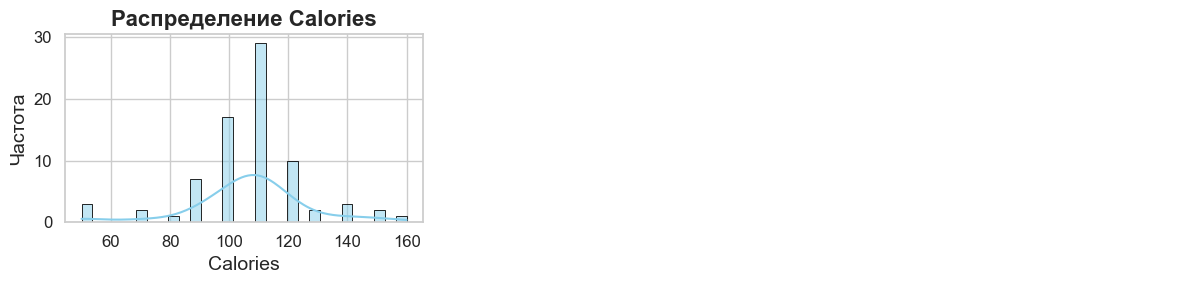

In [7]:
calorie_stats_sorted = np.sort(calorie_stats)


Message.print_message(
    'Исходя из массива и гистограммы видно, что характерно относительно РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ',
    Color.BLUE,
    Color.LIGHT_WHITE
)

print(calorie_stats_sorted)

df = pd.DataFrame({'Calories': calorie_stats})
builder = Builder(df=df)



builder.build_histograms(columns=['Calories'])

4. Похоже, что большинство значений выше среднего. Давайте посмотрим, является ли медиана наиболее корректным показателем набора данных.

Вычислите медиану набора данных и сохраните свой ответ в median_calories. Выведите медиану, чтобы вы могли видеть, как она сравнивается со средним значением.

In [10]:
median_calories = np.median(calorie_stats)
Message.print_message(
    f'Медиана набора данных - {median_calories:.2f}, при этом среднее значение - {average_calories:.2f}',
    Color.CYAN,
    Color.LIGHT_WHITE
)



+--------------------------------------------------------------------+
| Медиана набора данных - 110.00, при этом среднее значение - 106.88 |
+--------------------------------------------------------------------+


5. В то время как медиана показывает, что по крайней мере половина наших значений составляет более 100 калорий, было бы более впечатляюще показать, что значительная часть конкурентов имеет более высокое количество калорий, чем CrunchieMunchies.

Рассчитайте различные процентили и распечатайте их, пока не найдете наименьший процентиль, превышающий 60 калорий. Сохраните это значение в переменной nth_percentile.


+-----------------------------------------------------------------+
| Наименьший процентиль, превышающий 60 калорий: 4% (70 каллорий) |
+-----------------------------------------------------------------+


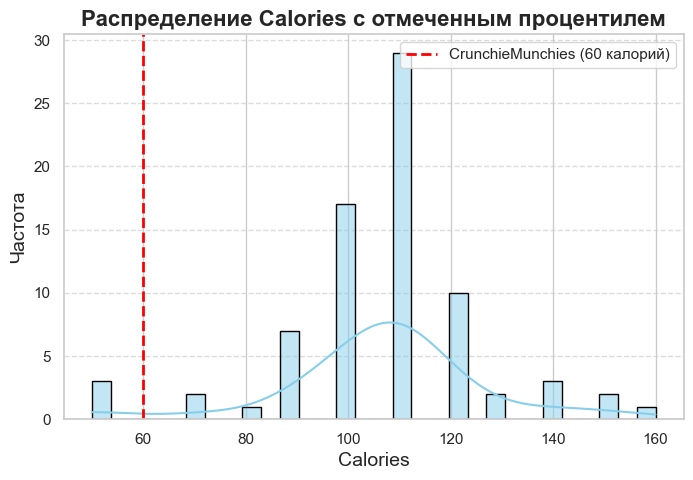

In [12]:
percentiles = np.percentile(calorie_stats, np.arange(0, 101, 1))

nth_percentile = next(p for p in range(101) if percentiles[p] > our_calories)

Message.print_message(
    f"Наименьший процентиль, превышающий {our_calories} калорий: {nth_percentile}% (70 калорий)",
    Color.BLUE,
    Color.LIGHT_WHITE
)

builder.plot_percentile_line(column='Calories', our_value=60)


6. Хотя процентиль показывает нам, что у большинства конкурентов количество калорий намного выше, это неудобная концепция для использования в маркетинговых материалах.

Вместо этого давайте подсчитаем процент хлопьев, в которых содержится более 60 калорий на порцию. Сохраните свой ответ в переменной more_calories и распечатайте его

In [14]:
more_calories = np.sum(calorie_stats > our_calories) / len(calorie_stats) * 100

Message.print_message(
    f"Процент хлопьев с калориями более {our_calories}: {more_calories:.2f}%",
    Color.PURPLE,
    Color.LIGHT_WHITE
)



+----------------------------------------------+
| Процент хлопьев с калориями более 60: 96.10% |
+----------------------------------------------+


7. Это действительно высокий процент. Это будет очень полезно, когда мы будем продвигать CrunchieMunchies. Но один вопрос заключается в том, насколько велики различия в наборе данных? Можем ли мы сделать обобщение, что в большинстве злаков содержится около 100 калорий или разброс еще больше?

Рассчитайте величину отклонения, найдя стандартное отклонение, Сохраните свой ответ в calorie_std и распечатайте на терминале. Как мы можем включить эту ценность в наш анализ?

In [15]:
calorie_std = np.std(calorie_stats, ddof=0) 

Message.print_message(
    f"Стандартное отклонение калорий: {calorie_std:.2f}",
    Color.BLUE,
    Color.LIGHT_WHITE
)


+---------------------------------------+
| Стандартное отклонение калорий: 19.36 |
+---------------------------------------+


8. Напишите короткий абзац, в котором кратко изложите свои выводы и то, как, по вашему мнению, эти данные могут быть использованы в интересах Mycrunch при маркетинге CrunchieMunchies.

Анализ данных о калорийности конкурирующих злаков показал, что среднее значение калорий **значительно выше 60 калорий** на порцию, а большинство продуктов конкурентов содержат более 60 калорий. При этом стандартное отклонение показывает, что **разброс значений достаточно велик**, что делает CrunchieMunchies с 60 калориями **особенно привлекательным** для потребителей, следящих за калорийностью. Эти данные можно использовать в **маркетинговых материалах**, подчеркивая, что CrunchieMunchies предлагает **низкокалорийную альтернативу**, которая по вкусу и питательности **не уступает конкурентам**, при этом помогает контролировать калории, что особенно важно для современных потребителей, заботящихся о здоровье.

In [17]:
Message.print_message(
    f"Очень крутое задание! Побольше бы таких! Спасибо!",
    Color.PURPLE,
    Color.LIGHT_WHITE
)


+---------------------------------------------------+
| Очень крутое задание! Побольше бы таких! Спасибо! |
+---------------------------------------------------+


In [45]:
Developer.print_info_of_developer()



+--------------------------------------------------------------+
| Задание было выполнено стажером Big Data в компании Innowise |
+--------------------------------------------------------------+

+--------------------------------------------------+
| Big Data Engineer: Панфиленко Станислав Игоревич |
+--------------------------------------------------+

+----------------------------------------------------------+
| Личная электронная почта: stanislav.panfilenko@gmail.com |
+----------------------------------------------------------+

